# **BOSTON CRIME ANALYSE**

In [ ]:
#Gerekli kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
#Crime verisi ve ilk 5 satırı
df = pd.read_csv("crime.csv", encoding='unicode_escape')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"



* **Öncelikle verimizin genel özelliklerine bakalım.**







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

In [ ]:
np.sum(df.isna())

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

In [ ]:
df.INCIDENT_NUMBER.describe()

count         327820
unique        290156
top       I162030584
freq              13
Name: INCIDENT_NUMBER, dtype: object

In [ ]:
df.OFFENSE_CODE.describe()

count    327820.000000
mean       2317.961171
std        1184.990073
min         111.000000
25%        1001.000000
50%        2907.000000
75%        3201.000000
max        3831.000000
Name: OFFENSE_CODE, dtype: float64

In [ ]:
df.OFFENSE_CODE.nunique()

222

In [ ]:
df.OFFENSE_CODE_GROUP.describe()

count                              327820
unique                                 67
top       Motor Vehicle Accident Response
freq                                38134
Name: OFFENSE_CODE_GROUP, dtype: object

In [ ]:
df.OFFENSE_DESCRIPTION.describe()

count                            327820
unique                              244
top       SICK/INJURED/MEDICAL - PERSON
freq                              19360
Name: OFFENSE_DESCRIPTION, dtype: object

In [ ]:
df.DISTRICT.describe()

count     326046
unique        12
top           B2
freq       51288
Name: DISTRICT, dtype: object

In [ ]:
df.STREET.describe()

count            316843
unique             4684
top       WASHINGTON ST
freq              14590
Name: STREET, dtype: object

In [ ]:
df.MONTH.describe()

count    327820.000000
mean          6.672213
std           3.253984
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: MONTH, dtype: float64

# ***Q1 -*** ***Suç yıllar içerinde nasıl değişmiş?*** 

Bu soruya cevap verebilmek için **aşağıdaki maddeleri** inceleyeceğiz:


>**a)** Yıllara göre toplam suç sayıları

>**b)**  Her bir yıl için suçların aylara göre dağılımı (suç toplamları, suç türleri)

>**c)**  Yıllar bütününde suç türlerinin dağılımı

>**d)**  Yıllar özelinde suç türlerinin dağılımı
















## **a)** Yıllara göre toplam suç sayıları

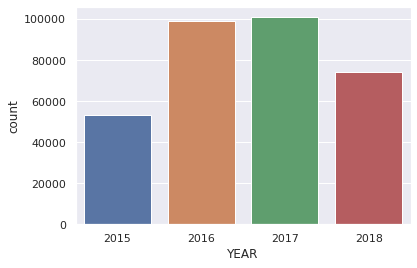

In [ ]:
#Yıllara göre toplam suç sayıları
sns.countplot(x="YEAR",data=df)

>* Yıllara göre suç toplamına bakıldığında 2015 ve 2018 yıllarında daha düşük 
sayıda suç verisine ulaşılıyor. 

In [ ]:
#Yıllar özelinde aylık suç sayıları
years_monthly =  df.groupby([df.YEAR, df.MONTH]).size()
years_monthly

YEAR  MONTH
2015  6        4191
      7        8326
      8        8343
      9        8415
      10       8308
      11       7818
      12       7991
2016  1        7837
      2        7310
      3        8199
      4        8101
      5        8582
      6        8558
      7        8620
      8        8940
      9        8526
      10       8586
      11       7924
      12       7951
2017  1        7993
      2        7408
      3        8179
      4        8072
      5        8721
      6        8990
      7        9077
      8        9209
      9        8950
      10       8854
      11       7943
      12       7542
2018  1        7795
      2        6943
      3        7778
      4        7935
      5        8939
      6        8883
      7        8617
      8        8645
      9        8132
      10        689
dtype: int64

> #Aylara dağılıma bakıldığında ise **2015 yılının ilk 5 ayı** ve **2018 yılının son 2 ayı** için veri olmadığı görülüyor. Ayrıca 2015 yılının 6. ayı ve 2018 yılının 10. ayı için sınırlı sayıda veri olduğu görülüyor.

> #Bu nedenle yıllar arası geçişte **2015 ve 2016** yıllarının **son 6** ayını, **2017 ve 2018** yıllarının **ilk 9** ayını karşılaştırmak daha sağlıklı olur.
>> * **2015 - 2016** : ***(↑↑)*** Son 6 aylardaki suç toplamları karşılaştırıldığında; 2016 yılının son 6 ayında suç oranında 1346'lık bir artış olduğu görülüyor. Bunu yıl geneline vurursak; 2015-2016 yılları arasında **artış** olduğu söylenebilir.

>> * **2016-2017 :** ***(↑)*** Bu yıllar arasında toplamda **1804**'lük bir **artış** var. 2016 yılına göre artış miktarında azalma olduğu görülüyor.

>> * **2017-2018 :** ***(↓↓↓)*** Bu yılların ilk 9 aylarındaki suç toplamları kıyaslandığında; 2018 yılında **2932**'lik bir **azalma** olduğu görülüyor. Son iki ayın verisiyle birlikte düşünüldüğünde, genel toplamdaki azalmanın devam etmesi beklenir.  



















## **b)** Suçların aylara göre dağılımı

### ***Suç Toplamları**





2015 ve 2018 yıllarında eksik veri olan aylar bulunduğu için tüm yıllar genelinde aylık suç sayılarına bakmak sağlıklı olmayabilir.

Bu nedenle yıllar özelinde aylık suç sayılarına bakalım.

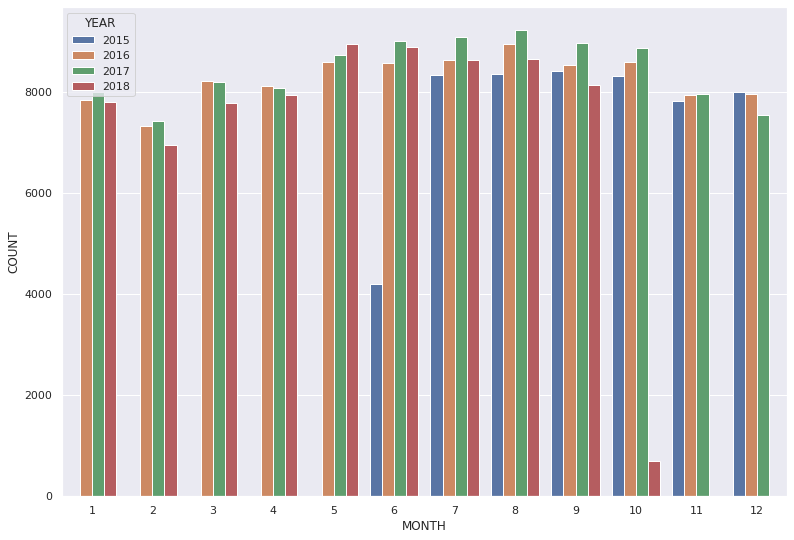

In [ ]:
#Yıl ve ay sütunları 
df_year_month = df.groupby([df.MONTH, df.YEAR]).size().reset_index()
df_year_month.columns=['MONTH','YEAR', "COUNT"]

#Suç sayısına göre sıralama
df_year_month = df_year_month.sort_values("COUNT",ascending=False)
df_year_month_sorted = df_year_month.groupby([df_year_month.YEAR]).head(12).sort_values("YEAR")

#Suç sayısına göre sütun grafiği
plt.figure(figsize=(13, 9))
chart=sns.barplot(x="MONTH",y="COUNT",hue="YEAR",data=df_year_month_sorted)



*   **2015 :** 6. ayda eksik data olduğundan değerlendirme dışı bırakılmalı. 7-10 arası aylar yakın seyretmiş, 11. ve 12. ayda düşüş olmuş.(İlk 5 ay yok) 

*   **2016 :** Hafif dalgalı bir seyir var, ilk 4 ve son 2 ay daha düşük. 
5-10 ayları aralığı nispeten yüksek, 8. ayda maksimum.


*   **2017 :** ilk 4 ve son 2 ay daha düşük (özellikle 2. ve 12. aylarda) 
5-10 ayları aralığı nispeten yüksek, 8. ayda maksimum.

*   **2018 :** 10. ayda eksik data olduğundan değerlendirme dışı bırakılmalı. Hafif dalgalı bir seyir var , 5. ayda maksimuma çıkıp sonrasında düşüşe geçiyor.
(2. ayda minimum, son 2 ay yok)





Grafik bütününe bakıldığında **5. ve 8. aylar arasında** suç sayılarının daha **yüksek** olduğunu söyleyebiliriz.

*Yıllar arasındaki farkı daha iyi görebilmek için çizgi grafiği çizdirelim.

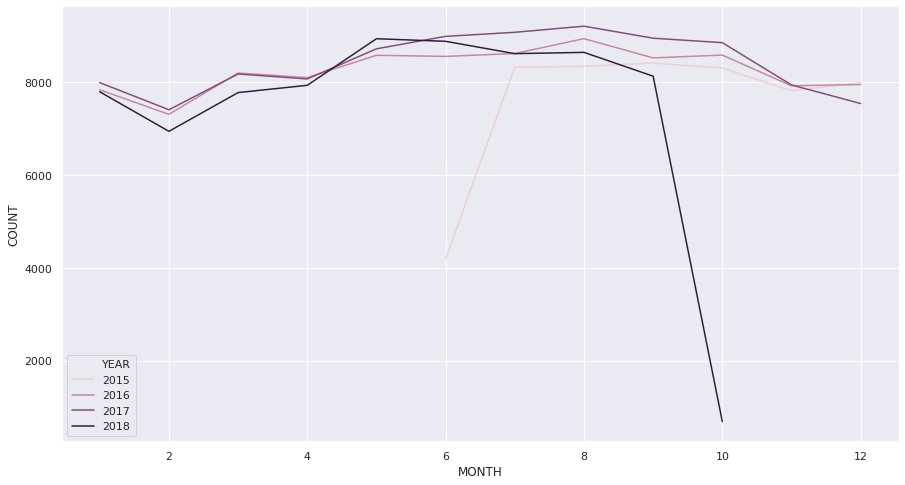

In [ ]:
#Yıl ve ay sütunları 
df_year_month = df.groupby([df.MONTH, df.YEAR]).size().reset_index()
df_year_month.columns=['MONTH','YEAR', "COUNT"]

#Suç sayısına göre sıralama
df_year_month = df_year_month.sort_values("COUNT",ascending=False)
df_year_month_sorted = df_year_month.groupby([df_year_month.YEAR]).head(12).sort_values("YEAR")

#Suç sayısına göre çizgi grafiği
plt.figure(figsize=(15, 8))
chart=sns.lineplot(x="MONTH",y="COUNT",hue="YEAR",data=df_year_month_sorted)

Artma ve azalma durumunun ilk 5 ay paralel seyrettiğini söyleyebiliriz. Sonrasında dalgalanmalar var, son aya kadar 2017 yılı diğerlerine göre daha yüksek.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 <a list of 41 Text major ticklabel objects>)

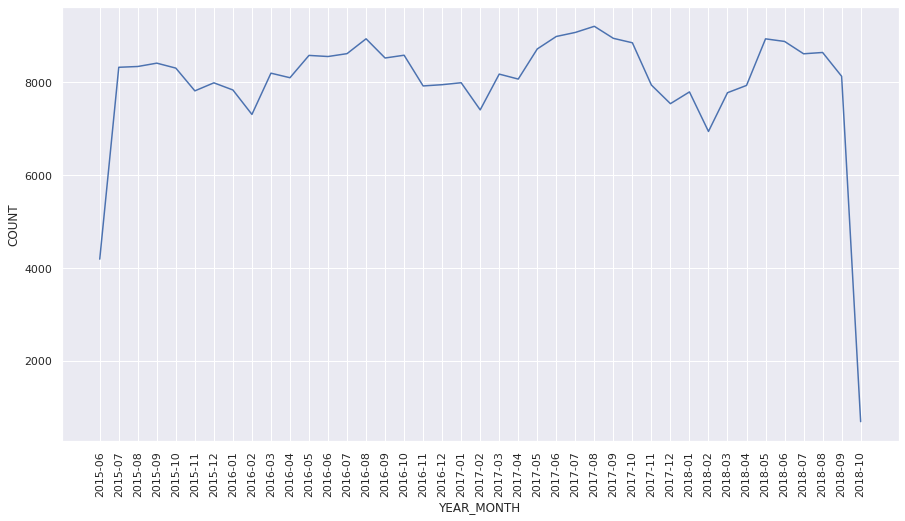

In [ ]:
#Yıl ve ay sütunları 
df_year_month = df.groupby([df.YEAR_MONTH]).size().reset_index()
df_year_month.columns=["YEAR_MONTH", "COUNT"]
df_year_month = df_year_month.astype({"YEAR_MONTH": str})

#Suç sayısına göre sıralama
df_year_month = df_year_month.sort_values("COUNT",ascending=False)
df_year_month_sorted = df_year_month.groupby([df_year_month.YEAR_MONTH]).head(12).sort_values("YEAR_MONTH")

#Suç sayısına göre çizgi grafiği
plt.figure(figsize=(15, 8))
chart=sns.lineplot(x="YEAR_MONTH",y="COUNT",data=df_year_month_sorted)
plt.xticks(rotation=90)

Her bir yıl için veride var alan ayların toplam suç sayılarını bu grafikte görebiliriz.

Eksik veriden kaynaklı ilk ve son ayı değerlendirmeye almamalıyız (2015-06 ve 2018-10).

Kış aylarında suç sayılarının daha düşük olduğunu görüyoruz.

**2017 Ağustos maksimum**, **2018 Şubat minimum**.

*Mevsimler özelinde dağılıma bakalım.

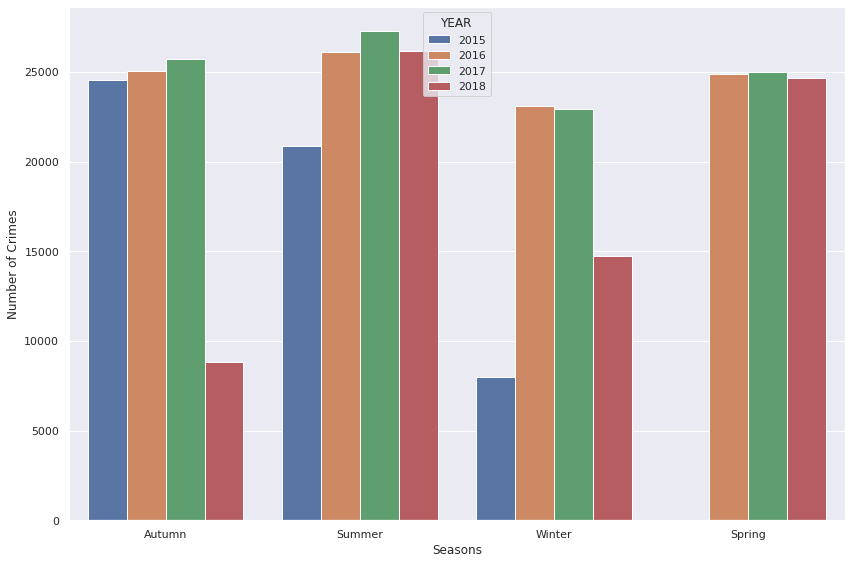

In [ ]:
#Ayları mevsimlere atama
def get_SeasonName(x):
    y = (x%12+3)//3
    if(y==1):
        return "Winter"
    elif(y==2):
        return "Spring"
    elif(y==3):
        return "Summer"
    else:
        return "Autumn"
    

df["SEASON"] = df["MONTH"].apply(lambda x: get_SeasonName(x))

#Her mevsim için suç sayıları
season = df.groupby(["YEAR","SEASON"])["OFFENSE_CODE"].count().reset_index()

#Mevsimlere göre sütun grafiği
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
season = sns.barplot(x="SEASON", y="OFFENSE_CODE", hue="YEAR", data=season)
season.set_ylabel("Number of Crimes")
season.set_xlabel("Seasons")
plt.tight_layout()
plt.show()

Eksik veriden dolayı 2015-Winter ve 2018-Autumn ve 2018-Winter değerlendirme dışı bırakılmalı.

Genele baktığımızda suç sayısının **kış sezonunda daha düşük**,   **yaz sezonunda daha yüksek** olduğunu söyleyebiliriz.



###  ***Suç Türleri**

Aylar özelinde suç türlerine bakalım, bazı aylarda eksik veri olduğundan toplamları daha düşük olacak. Sayı bazında değil türlerin dağılımı bazında inceleme yapacağız.

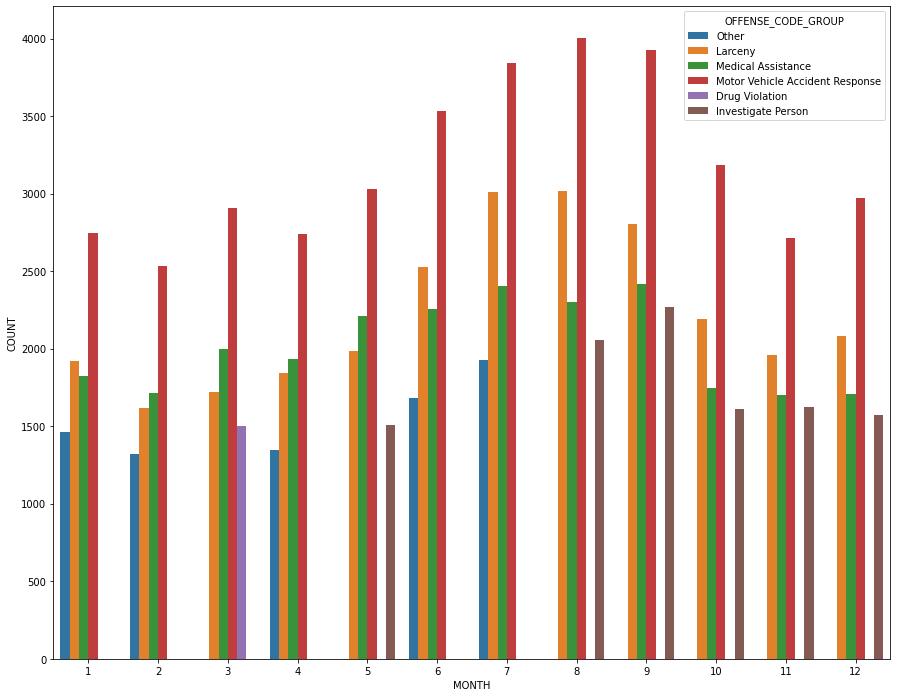

In [ ]:
offense_code_yearly = df.groupby(["MONTH","OFFENSE_CODE_GROUP"]).size().reset_index()
offense_code_yearly.columns = ['MONTH', 'OFFENSE_CODE_GROUP', 'COUNT']
offense_code_yearly = offense_code_yearly.sort_values("COUNT",ascending=False)
offense_code_yearly_head = offense_code_yearly.groupby(["MONTH"]).head(4).sort_values("MONTH")


plt.figure(figsize=(15, 12))
chart=sns.barplot(x="MONTH",y="COUNT",hue="OFFENSE_CODE_GROUP",data=offense_code_yearly_head)

Tüm aylar için **"Motor Vehicle Accident Response"** suç grubu **birinci** sırada. 

**"Larceny"** ve **"Medical Assistance"** grupları da ilk 3'te yer alıyorlar.

## **c)** Yıllar bütününde suç grupları ve suç türlerinin dağılımı

**Suç Grupları**

In [ ]:
#Yıllar bütününde suç gruplarının dağılımı
sorted_offense_group = df['OFFENSE_CODE_GROUP'].value_counts().to_frame().reset_index().sort_values('OFFENSE_CODE_GROUP', ascending=False)
sorted_offense_group

,index,OFFENSE_CODE_GROUP
0,Motor Vehicle Accident Response,38134
1,Larceny,26670
2,Medical Assistance,24226
3,Investigate Person,19176
4,Other,18612
...,...,...
62,HUMAN TRAFFICKING,7
63,INVESTIGATE PERSON,4
64,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,2
65,Biological Threat,2


Text(0.5, 1.0, 'Offense Code Groups TOP 12')

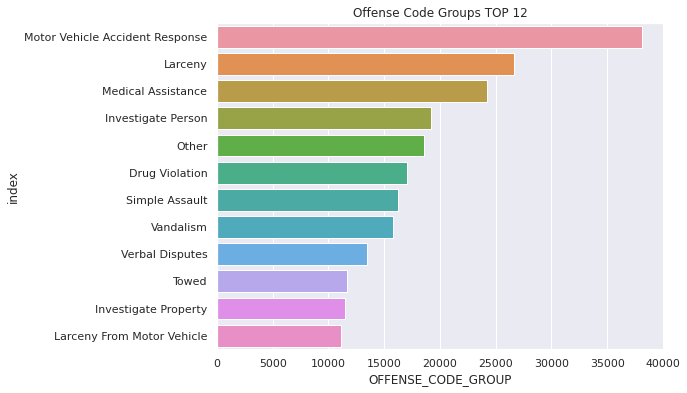

In [ ]:
#ilk 12 suç grubu
sorted_offense_group_head12 = sorted_offense_group.head(12)


#sütun grafiği
plt.figure(figsize=(8, 6))
chart=sns.barplot(x="OFFENSE_CODE_GROUP",y="index",data=sorted_offense_group_head12 )

chart.set_title('Offense Code Groups TOP 12')

Yıllar bütününde **"Motor Vehicle Accident Response"** , **"Larceny"** , **"Medical Assistance"** suç grupları ilk 3 sırada yer alıyor.

**Suç Türleri**

In [ ]:
#Yıllar bütününde suç türlerinin dağılımı
sorted_offense_desc = df['OFFENSE_DESCRIPTION'].value_counts().to_frame().reset_index().sort_values('OFFENSE_DESCRIPTION', ascending=False)
sorted_offense_desc

,index,OFFENSE_DESCRIPTION
0,SICK/INJURED/MEDICAL - PERSON,19360
1,INVESTIGATE PERSON,19180
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,16730
3,VANDALISM,15542
4,ASSAULT SIMPLE - BATTERY,15191
...,...,...
219,ASSAULT & BATTERY D/W - OTHER ON POLICE OFFICER,1
220,ROBBERY - UNARMED - CHAIN STORE,1
221,VIOLATION - RESTRAINING ORDER,1
222,AUTO THEFT OTHER,1


Text(0.5, 1.0, 'Offense Description TOP 12')

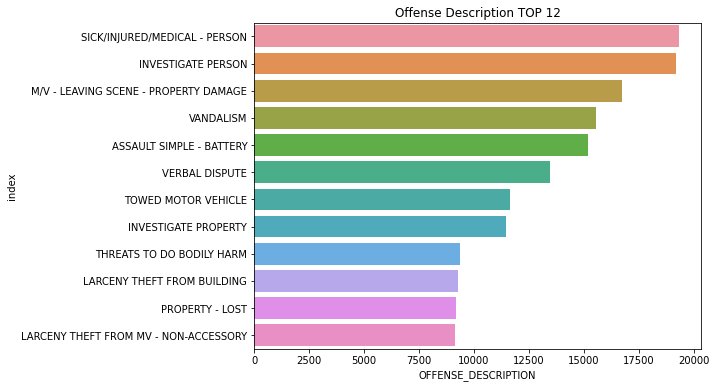

In [ ]:
#ilk 12 suç türü
sorted_offense_desc_head12 = sorted_offense_desc.head(12)


#sütun grafiği
plt.figure(figsize=(8, 6))
chart=sns.barplot(x="OFFENSE_DESCRIPTION",y="index",data=sorted_offense_desc_head12 )

chart.set_title('Offense Description TOP 12')

Yıllar bütününde **"Sick / Injured / Medical - Person"** , **"Investigate Person"** , **"M/V - Leaving Scene - Property Damage"** suç türleri ilk 3 sırada yer alıyor.

## **d)** Yıllar özelinde suç grupları ve suç türlerinin dağılımı

2015 ve 2018 yıllarında eksik aylar bulunduğundan suç sayıları daha düşük olacak, bu bölümde sayı olarak değil de dağılım olarak değerlendirme yapacağız.

**Suç Grupları**

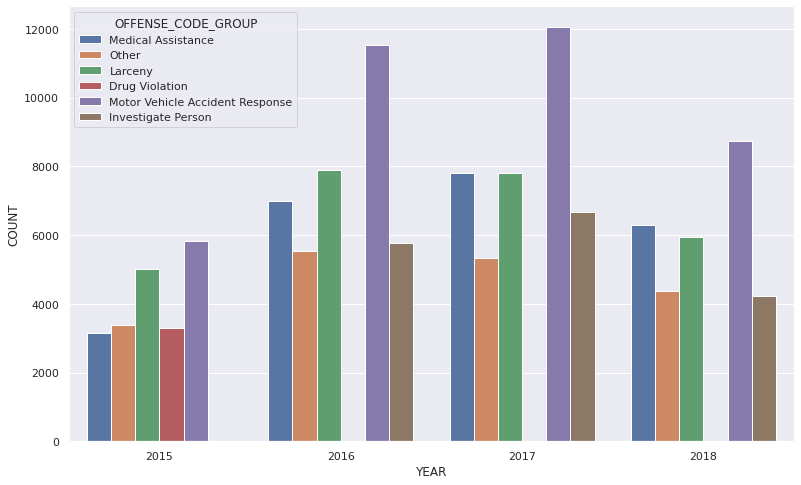

In [ ]:
#yıllar ve suç grupları
offense_code_yearly = df.groupby(["YEAR","OFFENSE_CODE_GROUP"]).size().reset_index()
offense_code_yearly.columns = ['YEAR', 'OFFENSE_CODE_GROUP', 'COUNT']
offense_code_yearly = offense_code_yearly.sort_values("COUNT",ascending=False)
offense_code_yearly_head = offense_code_yearly.groupby(["YEAR"]).head(5).sort_values("YEAR")

#sütun grafiği
plt.figure(figsize=(13, 8))
chart=sns.barplot(x="YEAR",y="COUNT",hue="OFFENSE_CODE_GROUP",data=offense_code_yearly_head)

Bu grafikte yıllar özelinde suç gruplarını görebiliyoruz.

Tüm yıllar için **"Motor Vehicle Accident Response"** suç grubu **birinci** sırada yer alıyor.

**"Larceny"** ve **"Medical Assistance"** suç grupları 2016,2017 ve 2018 için ilk **3**'te yer alıyor.

**Suç Türleri**

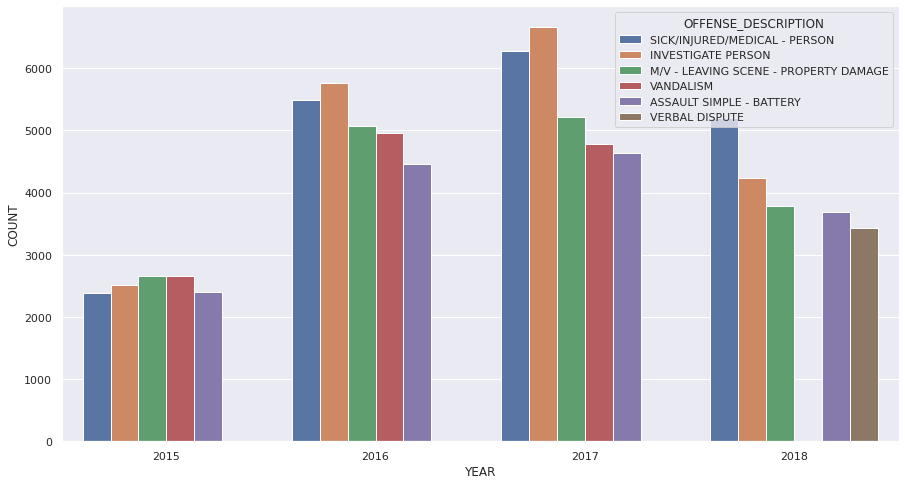

In [ ]:
#yıllar ve suç türleri
offense_desc_yearly = df.groupby(["YEAR","OFFENSE_DESCRIPTION"]).size().reset_index()
offense_desc_yearly.columns = ['YEAR', 'OFFENSE_DESCRIPTION', 'COUNT']
offense_desc_yearly = offense_desc_yearly.sort_values("COUNT",ascending=False)
offense_desc_yearly_head = offense_desc_yearly.groupby(["YEAR"]).head(5).sort_values("YEAR")

#sütun grafiği
plt.figure(figsize=(15, 8))
chart=sns.barplot(x="YEAR",y="COUNT",hue="OFFENSE_DESCRIPTION",data=offense_desc_yearly_head)

Bu grafikte yıllar özelinde suç türlerini görebiliyoruz.

Son 3 yıl için **"Investigate Person"** ve **"Sick / Injured/ Medical - Person"** suç türlerinin **ilk 2**'de olduğunu görüyoruz. 


# ***Q2 - Bir suçun nerede veya ne zaman işleneceğini tahmin etmek mümkün müdür?***


## a) Boston genelinde suç sayılarının bölge, gün ve saatlere dağılımı

Öncelikle Boston genelindeki suç sayılarını bölge, gün ve saat açısından inceleyelim.

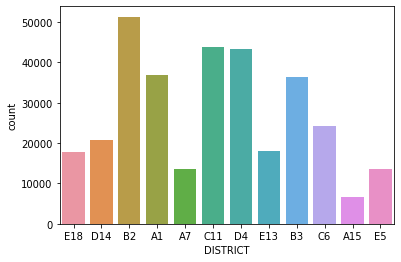

In [ ]:
#bölgelere göre suç sayıları
sns.countplot(x="DISTRICT",data=df)

En çok suç işlenen bölgelerin sırasıyla** B2, C11 ve D4 **olduğunu görüyoruz. Suç sayısının en az olduğu bölgeler sırasıyla **A15, A7 ve E5**.

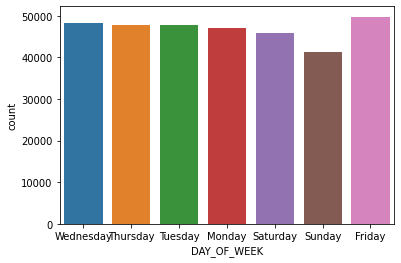

In [ ]:
#günlere göre suç sayıları
sns.countplot(x="DAY_OF_WEEK",data=df)

Haftanın günlerinde genel olarak dengeli bir dağılım olduğu görülüyor. **Cuma günü** nispeten **fazla** ve pazar günü nispeten az suç sayısına sahip. 

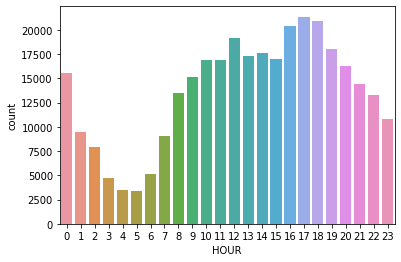

In [ ]:
#saatlere göre suç sayıları
sns.countplot(x="HOUR",data=df)

En çok suçun **16.00 - 19.00** saat aralığında işlendiği görülüyor. Gece saatlerindeki suç sayılarının gündüze göre oldukça düşük olduğu söylenebilir.

Daha spesifik yer ve zaman tahmini yapabilmek için en çok suç işlenen bölgeleri ve o bölgelerdeki en çok işlenen suçları inceleyelim.

Sonrasında tespit ettiğimiz suçların hangi sokakta ve hangi gün ve saatlerde yoğunlaştığına bakalım.

## b) En çok suçun işlendiği 3 bölge özelinde suç incelemesi

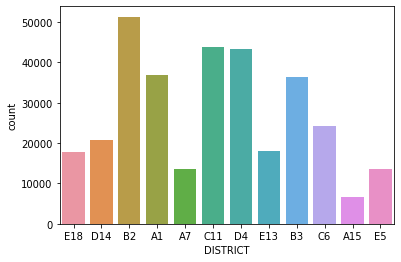

In [ ]:
#bölgelere göre suç sayıları
sns.countplot(x="DISTRICT",data=df)

Suç sayısının fazla olduğu B2, C11 ve D4 bölgeleri özelinde suç gruplarının ilk 5'ine bakalım. 



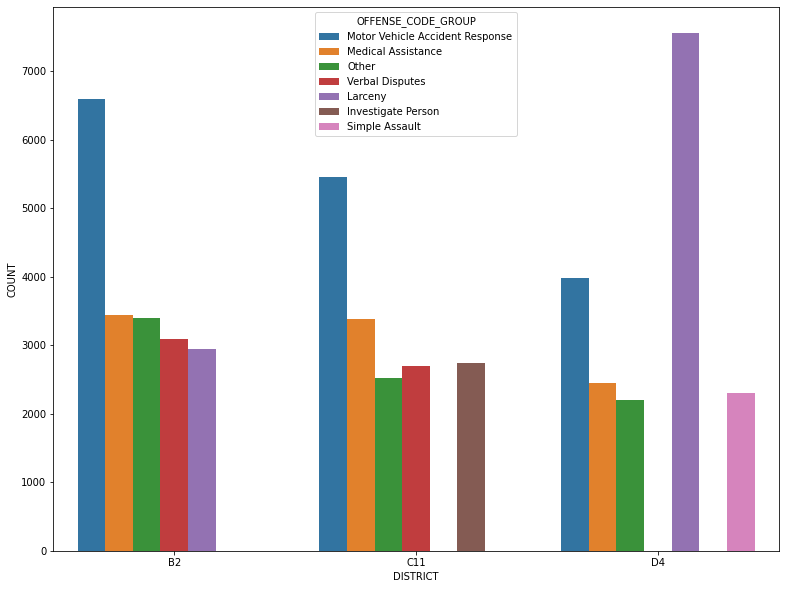

In [ ]:
#Bölgeleri B2, C11 ve D4 olarak sınırlama
b2_d4_c11 = df.loc[(df.DISTRICT == "B2") | (df.DISTRICT == "C11") | (df.DISTRICT == "D4")]

#suç grubuna göre gruplama ve sıralama
b2_d4_c11_offense_code = b2_d4_c11.groupby(["DISTRICT","OFFENSE_CODE_GROUP"]).size().reset_index()
b2_d4_c11_offense_code.columns = ['DISTRICT', 'OFFENSE_CODE_GROUP', 'COUNT']
b2_d4_c11_offense_code = b2_d4_c11_offense_code.sort_values("COUNT",ascending=False)
b2_d4_c11_offense_code_head = b2_d4_c11_offense_code.groupby(["DISTRICT"]).head(5).sort_values("DISTRICT")

#sütun grafiği
plt.figure(figsize=(13, 10))
chart=sns.barplot(x="DISTRICT",y="COUNT",hue="OFFENSE_CODE_GROUP",data=b2_d4_c11_offense_code_head)

**B2 ve C11** bölgelerinde **"Motor Vehicle Accident" **suç grubunun, **D4** bölgesinde ise **"Larceny"** suç grubunun yüksek olduğunu görüyoruz.



Herhangi bir yanılgı olmaması için bölge sınırlandırması yapmadan bu suç gruplarının bölgelere dağılımına da ayrıca bakalım.

In [ ]:
b2_motor = df.loc[(df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") ]
b2_motor_dıst = b2_motor.groupby(df.DISTRICT).size().sort_values(ascending=False)
b2_motor_dıst.head(10)

DISTRICT
B2     6590
C11    5461
D4     3980
B3     3934
A1     2936
D14    2928
C6     2793
E18    2437
E13    2232
E5     1852
dtype: int64

Motor Vehicle Response suçu özelinde baktığımızda da en çok B2 ve C11 bölgesinde işlendiğini görüyoruz.

In [ ]:
b2_larceny = df.loc[(df.OFFENSE_CODE_GROUP == "Larceny") ]
b2_larceny_dıst = b2_larceny.groupby(df.DISTRICT).size().sort_values(ascending=False)
b2_larceny_dıst.head(10)

DISTRICT
D4     7554
A1     4849
B2     2939
C11    2226
C6     1971
D14    1671
B3     1240
E13    1224
E18     989
A7      770
dtype: int64

Larceny suçu özelinde baktığımızda da en çok D4 bölgesinde işlendiğini görüyoruz.

Bu bölgeler ve bu suç türleri özelinde inceleme yapabiliriz.

### **i) B2 bölgesi** 

In [ ]:
#Bölgeyi B2 olarak sınırlama
b2 = df.loc[(df.DISTRICT == "B2")]

#B2 bölgesindeki suç gruplarını sayma ve sıralama
b2_sorted = b2.groupby(b2.OFFENSE_CODE_GROUP).size().sort_values(ascending=False)
b2_sorted.head(10)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    6590
Medical Assistance                 3446
Other                              3401
Verbal Disputes                    3089
Larceny                            2939
Investigate Person                 2806
Simple Assault                     2581
Vandalism                          2501
Drug Violation                     2350
Investigate Property               1746
dtype: int64

En büyük paya sahip olan **"Motor Vehicle Accident Response"** suç grubunu inceleyelim.

Bu suç grubundaki suç türlerini inceleyelim.

In [ ]:
b2_motor = df.loc[(df.DISTRICT == "B2") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") ]
b2_motor_desc = b2_motor.groupby(b2_motor.OFFENSE_DESCRIPTION).size().sort_values(ascending=False)
b2_motor_desc.head(10)

OFFENSE_DESCRIPTION
M/V - LEAVING SCENE - PROPERTY DAMAGE              2832
M/V ACCIDENT - PROPERTY  DAMAGE                    1043
M/V ACCIDENT - PERSONAL INJURY                     1036
M/V ACCIDENT - OTHER                                492
M/V - LEAVING SCENE - PERSONAL INJURY               316
M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY          301
M/V ACCIDENT - INVOLVING  BICYCLE - INJURY          155
M/V ACCIDENT - OTHER CITY VEHICLE                   153
M/V ACCIDENT - POLICE VEHICLE                       141
M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY      66
dtype: int64

Motor Vehicle Accident Response suç grubunun **% 43**'lük kısmını **"M/V - LEAVING SCENE - PROPERTY DAMAGE"** suç türü oluşturuyor.

Bu suç türü özelinde **street-ay**, **gün-saat** incelemesi yapalım.

**!!! B2 Bölgesi - "M/V - LEAVING SCENE - PROPERTY DAMAGE"**

In [ ]:
b2_motor = df.loc[(df.DISTRICT == "B2") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") & (df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE")]
b2_motor_desc = b2_motor.groupby(b2_motor.STREET).size().sort_values(ascending=False)
b2_motor_desc.head(10)

STREET
BLUE HILL AVE                253
DUDLEY ST                    130
COLUMBIA RD                   98
WARREN ST                     74
WASHINGTON ST                 62
HUNTINGTON AVE                48
TREMONT ST                    42
MARTIN LUTHER KING JR BLV     34
PARKER ST                     32
HUMBOLDT AVE                  31
dtype: int64

En çok suçun işlendiği sokak "BLUE HILL AVE" için suç sayılarının aylara dağılımına bakalım.

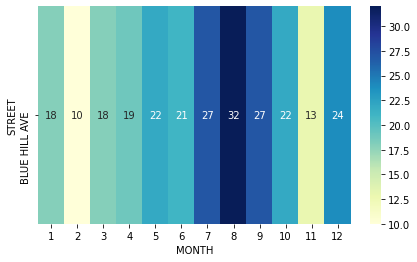

In [ ]:
b2_motor_leaving = df.loc[(df.DISTRICT == "B2") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") & (df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE") & (df.STREET == "BLUE HILL AVE")]
b2_motor_leaving_sorted = b2_motor_leaving.groupby(["MONTH", "STREET"]).size().reset_index()
b2_motor_leaving_sorted.columns = ['MONTH', 'STREET', 'COUNT']
b2_motor_leaving_sorted = b2_motor_leaving_sorted.sort_values("COUNT",ascending=False)
b2_motor_leaving_sorted_head = b2_motor_leaving_sorted.groupby(["MONTH"]).head(24).sort_values("MONTH")


crimes = b2_motor_leaving_sorted_head.pivot("STREET", "MONTH", "COUNT")
plt.figure(figsize=(7, 4))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="YlGnBu")

Suçun en çok **7,8 ve 9**. aylarda işlendiği görülüyor.



 Suçun en yüksek olduğu sokak **Blue Hill Ave** için gün ve saat incelemesi yapalım.

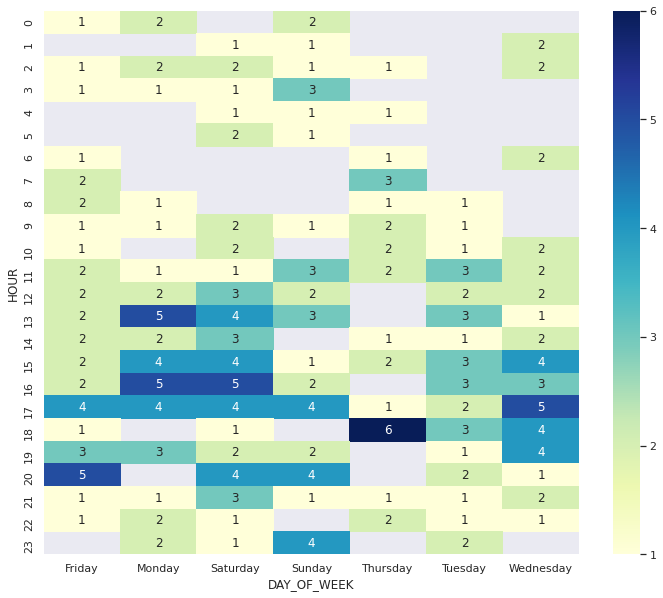

In [ ]:
b2_motor_leaving = df.loc[(df.DISTRICT == "B2") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") & (df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE")& (df.STREET == "BLUE HILL AVE")]
b2_motor_leaving_time = b2_motor_leaving.groupby(["DAY_OF_WEEK", "HOUR"]).size().reset_index()
b2_motor_leaving_time.columns = ['DAY_OF_WEEK', 'HOUR', 'COUNT']
b2_motor_leaving_time = b2_motor_leaving_time.sort_values("COUNT",ascending=False)
b2_motor_leaving_time_head = b2_motor_leaving_time.groupby(["DAY_OF_WEEK"]).head(24).sort_values("DAY_OF_WEEK")


crimes = b2_motor_leaving_time_head.pivot("HOUR", "DAY_OF_WEEK", "COUNT")
plt.figure(figsize=(12, 10))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="YlGnBu")

En çok; 


**Monday -** **13, 15-17** 

***Saturday - 15-17 ***

**Wednesday -** **15-19** 

gün ve saatlerinde işlendiğini görüyoruz.


***Tahmin :*** **B2** Bölgesi; **Blue Hill Ave** sokağında; **7,8 ve 9**. aylarda; **pazartesi, çarşamba ve ctesi** günleri yukarıda belirtilen saatlerde; **"M/V - LEAVING SCENE - PROPERTY DAMAGE"** suçuna rastlanması muhtemel gözüküyor.

### **ii) C11 Bölgesi**

In [ ]:
#bölgeyi C11 olarak sınırlama
c11 = df.loc[(df.DISTRICT == "C11")]

#suç gruplarını sayma ve sıralama
c11_sorted = c11.groupby(c11.OFFENSE_CODE_GROUP).size().sort_values(ascending=False)
c11_sorted.head(10)


OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    5461
Medical Assistance                 3388
Investigate Person                 2744
Verbal Disputes                    2698
Other                              2524
Vandalism                          2502
Drug Violation                     2266
Larceny                            2226
Simple Assault                     2159
Investigate Property               1393
dtype: int64

En büyük paya sahip olan **"Motor Vehicle Accident Response"** suç grubunu inceleyelim.

In [ ]:
c11_motor = df.loc[(df.DISTRICT == "C11") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") ]
c11_motor_sorted = c11_motor.groupby(c11_motor.OFFENSE_DESCRIPTION).size().sort_values(ascending=False)
c11_motor_sorted.head(10)

OFFENSE_DESCRIPTION
M/V - LEAVING SCENE - PROPERTY DAMAGE              2792
M/V ACCIDENT - PROPERTY  DAMAGE                     899
M/V ACCIDENT - PERSONAL INJURY                      684
M/V ACCIDENT - OTHER                                333
M/V - LEAVING SCENE - PERSONAL INJURY               200
M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY          195
M/V ACCIDENT - POLICE VEHICLE                       122
M/V ACCIDENT - OTHER CITY VEHICLE                    91
M/V ACCIDENT - INVOLVING  BICYCLE - INJURY           76
M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY      40
dtype: int64

Motor Vehicle Accident Response suç grubunun **% 51**'lik kısmını **"M/V - LEAVING SCENE - PROPERTY DAMAGE"** oluşturuyor.

Bu suç özelinde **street-ay**, **gün-saat** incelemesi yapalım.

**!!! C11 Bölgesi - "M/V - LEAVING SCENE - PROPERTY DAMAGE"**

In [ ]:
c11_motor = df.loc[(df.DISTRICT == "C11") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") & (df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE")]
c11_motor_st = c11_motor.groupby(c11_motor.STREET).size().sort_values(ascending=False)
c11_motor_st.head(10)

STREET
DORCHESTER AVE    306
ADAMS ST          203
WASHINGTON ST      99
GENEVA AVE         86
BOWDOIN ST         84
COLUMBIA RD        73
PARK ST            50
NEPONSET AVE       48
GALLIVAN BLVD      42
DRAPER ST          40
dtype: int64

En çok suçun işlendiği sokak "DORCHESTER AVE" için suç sayılarının aylara dağılımına bakalım.

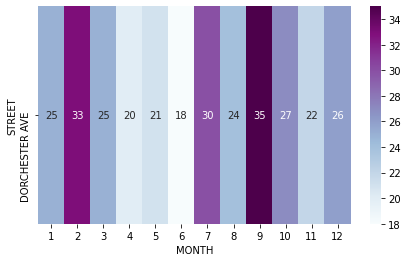

In [ ]:
c11_motor_leaving = df.loc[(df.DISTRICT == "C11") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") & (df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE")& (df.STREET == "DORCHESTER AVE")]
c11_motor_leaving_street = c11_motor_leaving.groupby(["MONTH", "STREET"]).size().reset_index()
c11_motor_leaving_street .columns = ['MONTH', 'STREET', 'COUNT']
c11_motor_leaving_street  = c11_motor_leaving_street.sort_values("COUNT",ascending=False)
c11_motor_leaving_street_head = c11_motor_leaving_street.groupby(["MONTH"]).head(24).sort_values("MONTH")


crimes = c11_motor_leaving_street_head.pivot("STREET", "MONTH", "COUNT")
plt.figure(figsize=(7, 4))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="BuPu")

 **9,2 ve 7**. aylarda suç sayıları yüksek.

 **! Dorchester Ave** için gün-saat incelemesi yapalım. 

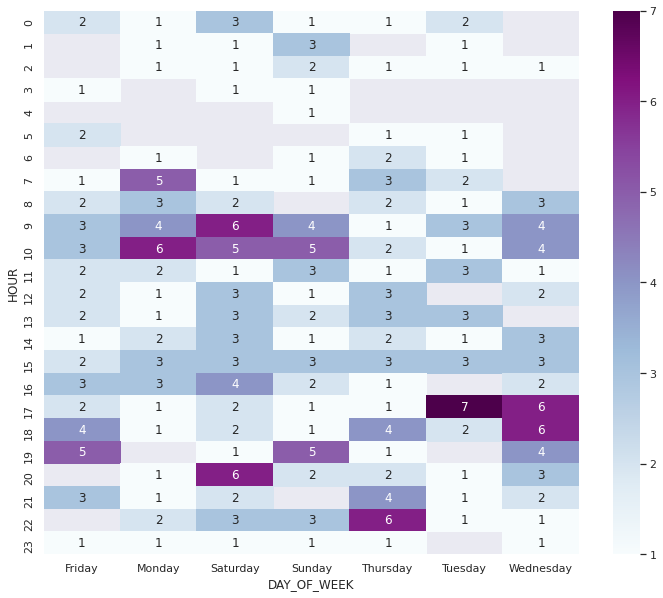

In [ ]:
c11_motor_leaving = df.loc[(df.DISTRICT == "C11") & (df.OFFENSE_CODE_GROUP == "Motor Vehicle Accident Response") & (df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE")& (df.STREET == "DORCHESTER AVE")]
c11_motor_leaving_time = c11_motor_leaving.groupby(["DAY_OF_WEEK", "HOUR"]).size().reset_index()
c11_motor_leaving_time.columns = ['DAY_OF_WEEK', 'HOUR', 'COUNT']
c11_motor_leaving_time = c11_motor_leaving_time.sort_values("COUNT",ascending=False)
c11_motor_leaving_time_head = c11_motor_leaving_time.groupby(["DAY_OF_WEEK"]).head(24).sort_values("DAY_OF_WEEK")


crimes = c11_motor_leaving_time_head.pivot("HOUR", "DAY_OF_WEEK", "COUNT")
plt.figure(figsize=(12, 10))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="BuPu")

En çok;

**Monday -** **7-10**

**Saturday -** **20, 9-10**

**Wednesday -** **17-19**

gün ve saatlerinde işlendiğini görüyoruz.

***Tahmin :*** **C11** Bölgesi; **Dorchestor Ave** sokağında; **9,2 ve 7**. aylarda; **pazartesi, ctesi ve çarşamba** günleri yukarıda belirtilen saatlerde; **"M/V - LEAVING SCENE - PROPERTY DAMAGE"** suçuna rastlanması muhtemel gözüküyor.

### **iii) D4 bölgesi** 

In [ ]:
#bölgeyi d4 olarak sınırlama
d4 = df.loc[(df.DISTRICT == "D4")]

#suç grubuna göre sayma ve sıralama
d4_sorted = d4.groupby(x.OFFENSE_CODE_GROUP).size().sort_values(ascending=False)
d4_sorted.head(10)


OFFENSE_CODE_GROUP
Larceny                            7554
Motor Vehicle Accident Response    3980
Medical Assistance                 2442
Simple Assault                     2297
Other                              2195
Investigate Person                 2177
Drug Violation                     2092
Larceny From Motor Vehicle         2062
Towed                              2055
Vandalism                          1813
dtype: int64

En büyük paya sahip olan **Larceny** suç grubunu inceleyelim.


Bu suç grubundaki suç türlerini inceleyelim.

In [ ]:
d4_larceny = df.loc[(df.DISTRICT == "D4") & (df.OFFENSE_CODE_GROUP == "Larceny") ]
d4_larceny_sorted = d4_larceny.groupby(d4_larceny.OFFENSE_DESCRIPTION).size().sort_values(ascending=False)
d4_larceny_sorted.head(10)

OFFENSE_DESCRIPTION
LARCENY SHOPLIFTING                   3302
LARCENY THEFT FROM BUILDING           2375
LARCENY ALL OTHERS                     945
LARCENY THEFT OF BICYCLE               776
LARCENY PICK-POCKET                    113
LARCENY PURSE SNATCH - NO FORCE         30
LARCENY OTHER $200 & OVER                4
LARCENY THEFT FROM COIN-OP MACHINE       3
LARCENY IN A BUILDING $200 & OVER        2
LARCENY BICYCLE $200 & OVER              2
dtype: int64

* Larceny suç grubunun **% 75**'lik kısmını **"Larceny Shoplifting" ve "Larceny Theft From Building"** oluşturuyor.

* Bu iki suç özelinde **street-ay**, **gün-saat** incelemesi yapalım.


**!!! D4 Bölgesi - Larceny Shoplifting**

In [ ]:
d4_larceny_shoplifting = df.loc[(df.DISTRICT == "D4") & (df.OFFENSE_CODE_GROUP == "Larceny") & (df.OFFENSE_DESCRIPTION == "LARCENY SHOPLIFTING")]
d4_larceny_shoplifting_st = d4_larceny_shoplifting.groupby(d4_larceny_shoplifting.STREET).size().sort_values(ascending=False)
d4_larceny_shoplifting_st.head(10)

STREET
BOYLSTON ST          1350
NEWBURY ST            645
HUNTINGTON AVE        447
HARRISON AVE          161
WASHINGTON ST         146
KILMARNOCK ST         133
MASSACHUSETTS AVE     100
TREMONT ST             63
RING RD                46
COLUMBUS AVE           28
dtype: int64

En çok suçun işlendiği sokak "BOYLSTON ST" için suç sayılarının aylara dağılımına bakalım.

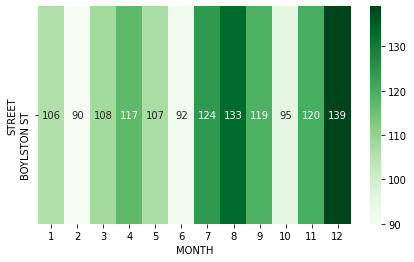

In [ ]:
d4_larceny_shoplifting = df.loc[(df.DISTRICT == "D4") & (df.OFFENSE_CODE_GROUP == "Larceny") & (df.OFFENSE_DESCRIPTION == "LARCENY SHOPLIFTING") & (df.STREET == "BOYLSTON ST")]
d4_larceny_shoplifting_street = d4_larceny_shoplifting.groupby(["MONTH", "STREET"]).size().reset_index()
d4_larceny_shoplifting_street.columns = ['MONTH', 'STREET', 'COUNT']
d4_larceny_shoplifting_street = d4_larceny_shoplifting_street.sort_values("COUNT",ascending=False)
d4_larceny_shoplifting_street_head = d4_larceny_shoplifting_street.groupby(["MONTH"]).head(24).sort_values("MONTH")


crimes = d4_larceny_shoplifting_street_head.pivot("STREET", "MONTH", "COUNT")
plt.figure(figsize=(7, 4))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="Greens")

**12.** ve **7-9**. aylarda yüksek olduğu görülüyor.

**! Boylston St**  için gün-saat incelemesi yapalım.

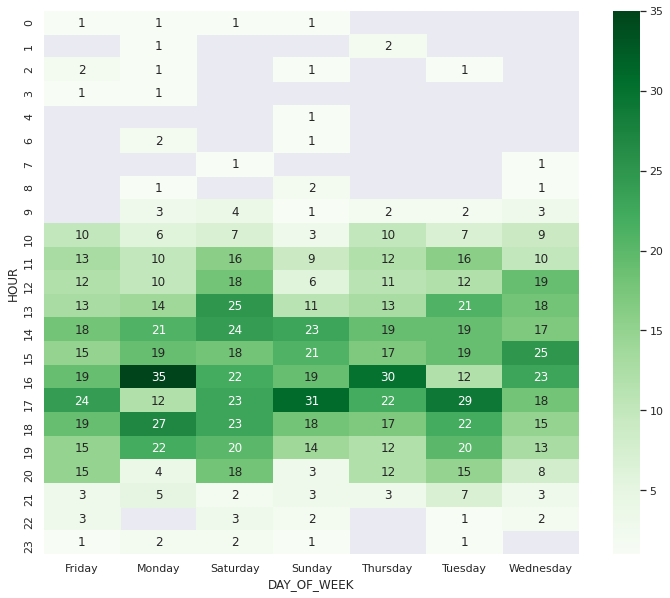

In [ ]:
d4_larceny_shoplifting_boylston = df.loc[(df.DISTRICT == "D4") & (df.OFFENSE_CODE_GROUP == "Larceny") & (df.OFFENSE_DESCRIPTION == "LARCENY SHOPLIFTING")& (df.STREET == "BOYLSTON ST")]
d4_larceny_shoplifting_boylston_time = d4_larceny_shoplifting_boylston.groupby(["DAY_OF_WEEK", "HOUR"]).size().reset_index()
d4_larceny_shoplifting_boylston_time.columns = ['DAY_OF_WEEK', 'HOUR', 'COUNT']
d4_larceny_shoplifting_boylston_time = d4_larceny_shoplifting_boylston_time.sort_values("COUNT",ascending=False)
d4_larceny_shoplifting_boylston_time_head = d4_larceny_shoplifting_boylston_time.groupby(["DAY_OF_WEEK"]).head(24).sort_values("DAY_OF_WEEK")


crimes = d4_larceny_shoplifting_boylston_time_head.pivot("HOUR", "DAY_OF_WEEK", "COUNT")
plt.figure(figsize=(12, 10))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="Greens")

Suçun **14-19** saatleri arasında yığıldığını görüyoruz, ayrıca **16-18** saatleri arasında yoğunluk artıyor.



***Tahmin :*** **D4** Bölgesi; **Boylston St** sokağında; **12.** ve **7-9**. aylarda; **14-19** saatleri arasında; **"LARCERY SHOPLIFTING"** suçuna rastlanması muhtemel gözüküyor.

**!!! D4 Bölgesi-Larceny Theft From Building**

In [ ]:
d4_larceny_build = df.loc[(df.DISTRICT == "D4") & (df.OFFENSE_CODE_GROUP == "Larceny") & (df.OFFENSE_DESCRIPTION == "LARCENY THEFT FROM BUILDING")]
d4_larceny_build_st = d4_larceny_build.groupby(d4_larceny_build.STREET).size().sort_values(ascending=False)
d4_larceny_build_st.head(10)

STREET
BOYLSTON ST          445
HUNTINGTON AVE       247
MASSACHUSETTS AVE    165
HARRISON AVE         165
NEWBURY ST           152
WASHINGTON ST         76
COMMONWEALTH AVE      68
BROOKLINE AVE         64
TREMONT ST            62
ALBANY ST             54
dtype: int64

En çok suçun işlendiği sokak "BOYLSTON ST" için suç sayılarının aylara dağılımına bakalım.

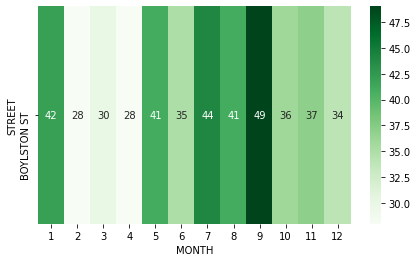

In [ ]:
d4_larceny_theft_building = df.loc[(df.DISTRICT == "D4") & (df.OFFENSE_CODE_GROUP == "Larceny") & (df.OFFENSE_DESCRIPTION == "LARCENY THEFT FROM BUILDING") & (df.STREET == "BOYLSTON ST")]
d4_larceny_theft_building_street = d4_larceny_theft_building.groupby(["MONTH", "STREET"]).size().reset_index()
d4_larceny_theft_building_street.columns = ['MONTH', 'STREET', 'COUNT']
d4_larceny_theft_building_street = d4_larceny_theft_building_street.sort_values("COUNT",ascending=False)
d4_larceny_theft_building_street_head = d4_larceny_theft_building_street.groupby(["MONTH"]).head(24).sort_values("MONTH")


crimes = d4_larceny_theft_building_street_head.pivot("STREET", "MONTH", "COUNT")
plt.figure(figsize=(7, 4))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="Greens")

 **7-9 ve 1.** aylarda yoğunluk olduğu görülüyor.

**! Boylston St** için gün ve saat incelemesi yapalım.

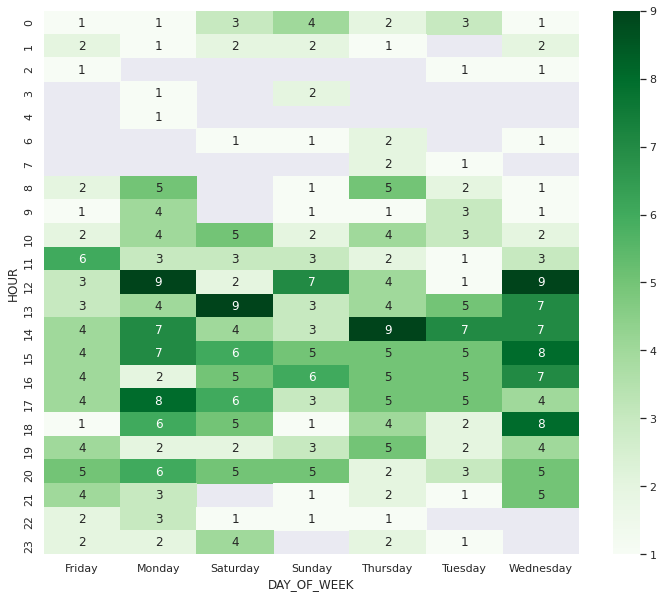

In [ ]:
d4_larceny_theft_building = df.loc[(df.DISTRICT == "D4") & (df.OFFENSE_CODE_GROUP == "Larceny") & (df.OFFENSE_DESCRIPTION == "LARCENY THEFT FROM BUILDING")& (df.STREET == "BOYLSTON ST")]
d4_larceny_theft_building_time = d4_larceny_theft_building.groupby(["DAY_OF_WEEK", "HOUR"]).size().reset_index()
d4_larceny_theft_building_time.columns = ['DAY_OF_WEEK', 'HOUR', 'COUNT']
d4_larceny_theft_building_time = d4_larceny_theft_building_time.sort_values("COUNT",ascending=False)
d4_larceny_theft_building_time_head = d4_larceny_theft_building_time.groupby(["DAY_OF_WEEK"]).head(24).sort_values("DAY_OF_WEEK")


crimes = d4_larceny_theft_building_time_head.pivot("HOUR", "DAY_OF_WEEK", "COUNT")
plt.figure(figsize=(12, 10))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="Greens")

En çok;

**Wednesday -** **12-18**

**Monday -** **12-18**

**Saturday -** **13-18**

gün ve saatlerinde işlendiğini görüyoruz.

***Tahmin :*** **D4** Bölgesi; **Boylston St** sokağında; **7-9 ve 1**. aylarda; **çarşamba, pazartesi ve ctesi** günleri yukarıda belirtilen saatlerde; **"LARCENY THEFT FROM BUILDING"** suçuna rastlanması muhtemel gözüküyor.

"Boylston St" sokağının "Larceny" suç grubu açısından ciddi bir potansiyele sahip olduğunu söyleyebiliriz.

# ***Q3 - Farklı suçların şehir üzerindeki dağılımı hakkında ne söyleyebilirsiniz?***


## a) Suç Gruplarının Bölgeler Üzerine Dağılımı

Suç gruplarının bölgeler üzerine dağılımına bakalım.

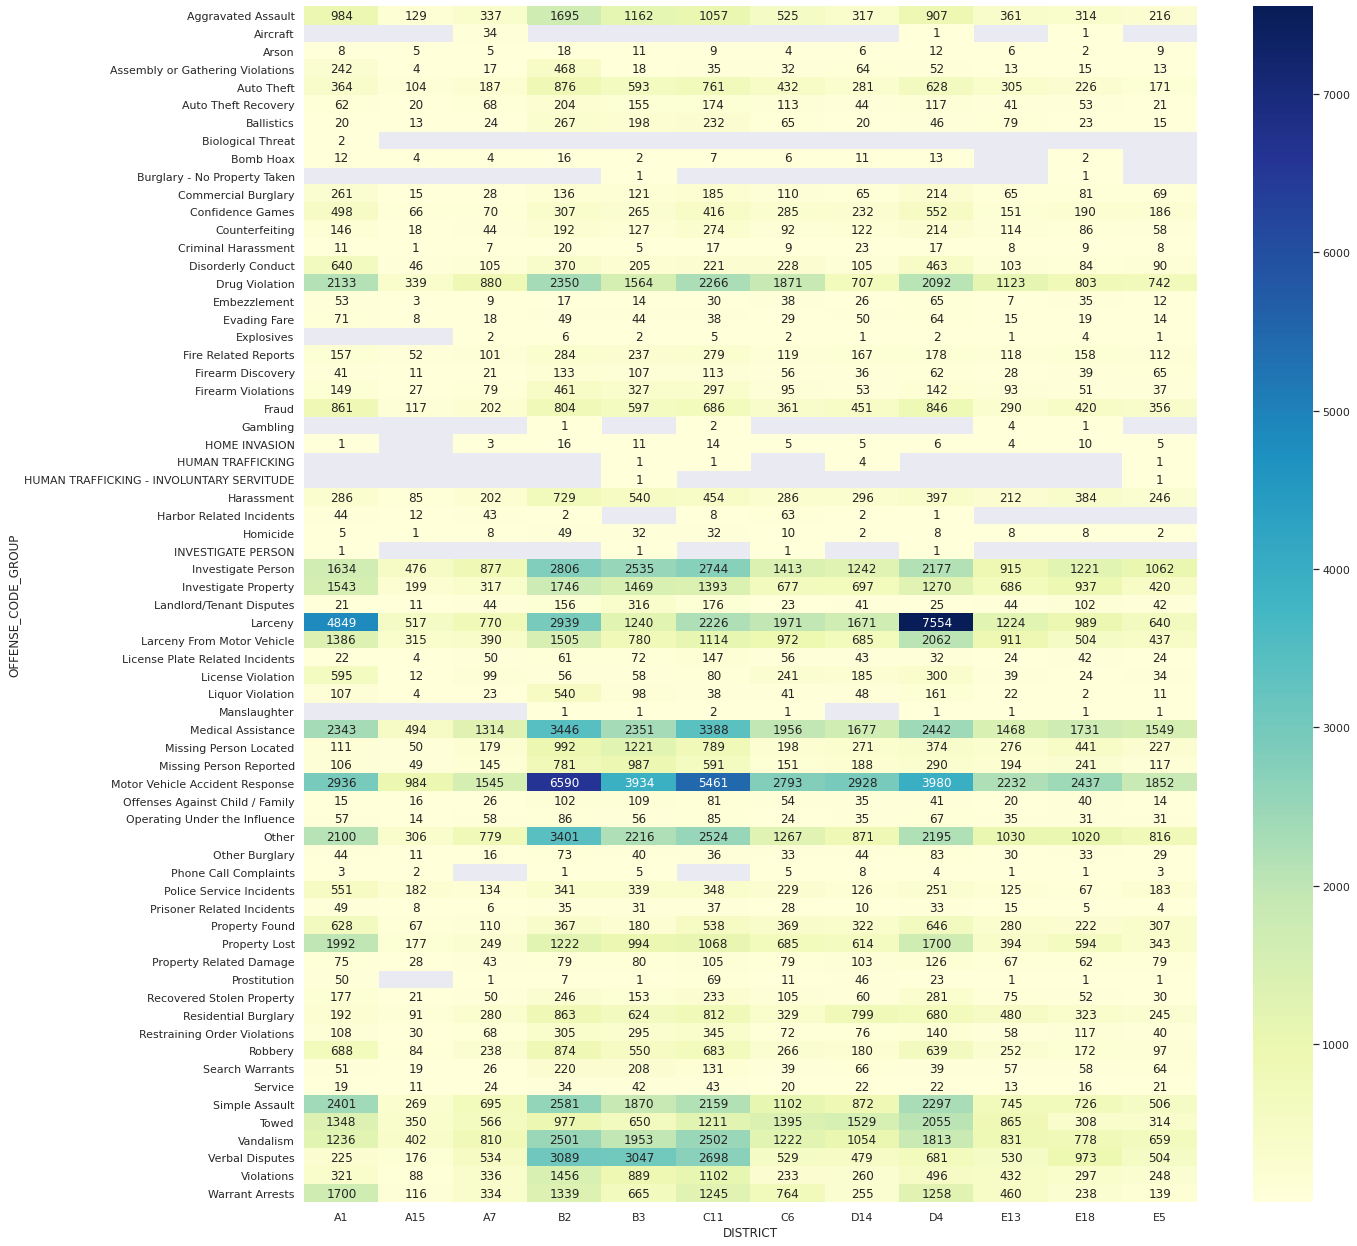

In [ ]:
crimedf_by_year_month = pd.DataFrame(df.groupby(['DISTRICT', 'OFFENSE_CODE_GROUP']).size().rename('COUNT').reset_index())
crimes = crimedf_by_year_month.pivot("OFFENSE_CODE_GROUP", "DISTRICT", "COUNT")
plt.figure(figsize=(20, 22))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="YlGnBu")

En çok görülen suçlar ve görüldüğü bölgeler sırasyıyla:

*   **"Motor Vehicle Accident Response"** - ***B2, C11, D4***
*   **"Larceny"** - ***D4, A1, B2***
*   **"Medical Assistance"** - ***C11 , B2, D4***



## b) Suç Türlerinin Bölge ve Sokaklar Üzerine Dağılımı

Suç türlerinin genel dağılımına bakalım.

In [ ]:
sorted_street = df['OFFENSE_DESCRIPTION'].value_counts().to_frame().reset_index().sort_values('OFFENSE_DESCRIPTION', ascending=False)
sorted_street.head(12)

,index,OFFENSE_DESCRIPTION
0,SICK/INJURED/MEDICAL - PERSON,19360
1,INVESTIGATE PERSON,19180
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,16730
3,VANDALISM,15542
4,ASSAULT SIMPLE - BATTERY,15191
5,VERBAL DISPUTE,13478
6,TOWED MOTOR VEHICLE,11632
7,INVESTIGATE PROPERTY,11443
8,THREATS TO DO BODILY HARM,9346
9,LARCENY THEFT FROM BUILDING,9293


En çok paya sahip **"SICK / INJURED / MEDICAL-PERSON"**,  **"INVESTIGATE PERSON"** ve **"M/V - LEAVING SCENE - PROPERTY DAMAGE"**	suçlarının **bölge ve street** üzerindeki dağılımına bakalım.



### **i) SICK / INJURED / MEDICAL - PERSON**



In [ ]:
sick_inj = df.loc[df.OFFENSE_DESCRIPTION == "SICK/INJURED/MEDICAL - PERSON"]
sick_inj_sorted_dist = sick_inj.groupby(sick_inj.DISTRICT).size().sort_values(ascending=False)
sick_inj_sorted_dist

DISTRICT
B2     2765
C11    2744
D4     1934
B3     1920
A1     1912
C6     1539
E18    1389
D14    1289
E5     1221
E13    1159
A7     1066
A15     374
dtype: int64

In [ ]:
sick_inj = df.loc[(df.OFFENSE_DESCRIPTION == "SICK/INJURED/MEDICAL - PERSON") ]
sick_inj_street = sick_inj.groupby(sick_inj.STREET).size().sort_values(ascending=False)
sick_inj_street.head(10)

STREET
WASHINGTON ST        738
DORCHESTER AVE       322
BLUE HILL AVE        317
MASSACHUSETTS AVE    291
CENTRE ST            281
TREMONT ST           268
COMMONWEALTH AVE     253
BOYLSTON ST          252
RIVER ST             208
COLUMBIA RD          197
dtype: int64

Bütün olarak bakarsak bu suçun en çok **Washington St, Dorchester Ave** sokaklarında ve **B2, C11** bölgelerinde işlendiğini görüyoruz.

Şimdi bu suç türü için bölge ve sokaklardaki dağılıma bakalım.


In [ ]:

map_hooray = folium.Map(location=[42.321010, -71.057083],
                        zoom_start = 12, min_zoom=12, tiles="Stamen Toner")

heat_df = df[(df['OFFENSE_DESCRIPTION']== 'SICK/INJURED/MEDICAL - PERSON')]
heat_df = heat_df[['Lat', 'Long']]
heat_df = heat_df.dropna()

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

↑↑↑ **"Sick / Injured / Medical - Person"** suçunun Boston geneline dağılımı

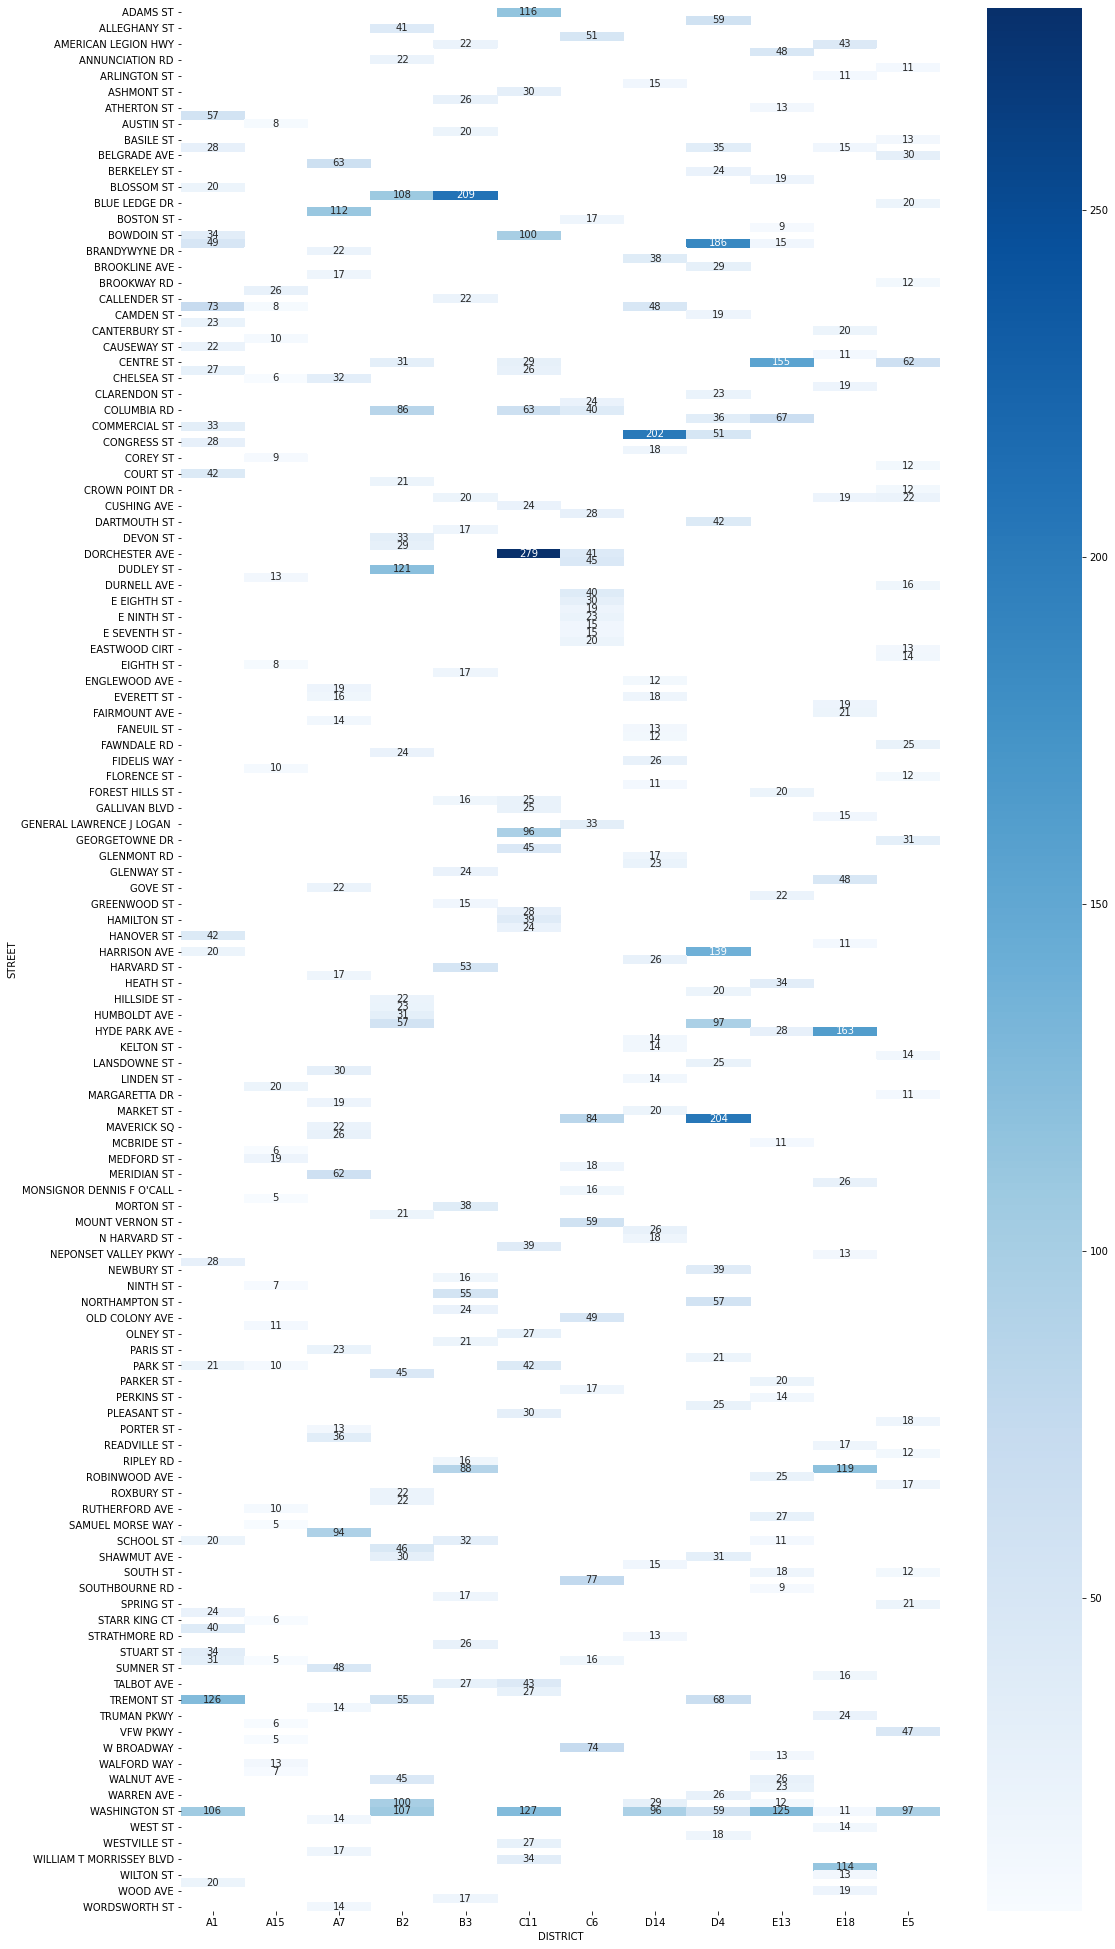

In [ ]:
sick_inj = df.loc[(df.OFFENSE_DESCRIPTION == "SICK/INJURED/MEDICAL - PERSON")]
sick_inj_st = sick_inj.groupby(["DISTRICT", "STREET"]).size().reset_index()
sick_inj_st.columns = ['DISTRICT', 'STREET', 'COUNT']
sick_inj_st = sick_inj_st.sort_values("COUNT",ascending=False)
sick_inj_st_head = sick_inj_st.groupby(["DISTRICT"]).head(24).sort_values("DISTRICT")


crimes = sick_inj_st_head.pivot("STREET", "DISTRICT", "COUNT")
plt.figure(figsize=(17,35))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="Blues")

En çok görüldüğü bölge-sokak eşleri:

*   Dorchester Ave - C11
*   Blue Hill Ave - B3
*   Market St - D4
*   Commonwealth Ave - D14








### **ii) INVESTIGATE PERSON**

In [ ]:
inv_per = df.loc[df.OFFENSE_DESCRIPTION == "INVESTIGATE PERSON"]
inv_per_dist = inv_per.groupby(inv_per.DISTRICT).size().sort_values(ascending=False)
inv_per_dist

DISTRICT
B2     2806
C11    2744
B3     2536
D4     2178
A1     1635
C6     1414
D14    1242
E18    1221
E5     1062
E13     915
A7      877
A15     476
dtype: int64

In [ ]:
inv_per = df.loc[df.OFFENSE_DESCRIPTION == "INVESTIGATE PERSON"]
inv_per_st = inv_per.groupby(inv_per.STREET).size().sort_values(ascending=False)
inv_per_st.head(12)

STREET
WASHINGTON ST        839
BLUE HILL AVE        486
CENTRE ST            301
BOYLSTON ST          274
DORCHESTER AVE       274
HARRISON AVE         243
COMMONWEALTH AVE     231
W BROADWAY           223
TREMONT ST           221
MASSACHUSETTS AVE    206
HYDE PARK AVE        198
RIVER ST             192
dtype: int64

Bütün olarak bakarsak bu suçun en çok **Washington St, Blue Hill Ave** sokaklarında ve **B2, C11** bölgelerinde işlendiğini görüyoruz.

Şimdi bu suç türü için **bölge-sokak** özelinde inceleme yapalım.

In [ ]:
map_hooray = folium.Map(location=[42.321010, -71.057083],
                        zoom_start = 12, min_zoom=12, tiles="Stamen Toner")

heat_df = df[(df['OFFENSE_DESCRIPTION']== 'INVESTIGATE PERSON')]
heat_df = heat_df[['Lat', 'Long']]
heat_df = heat_df.dropna()

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

↑↑↑ **"Investigate Person"** suçunun Boston geneline dağılımı

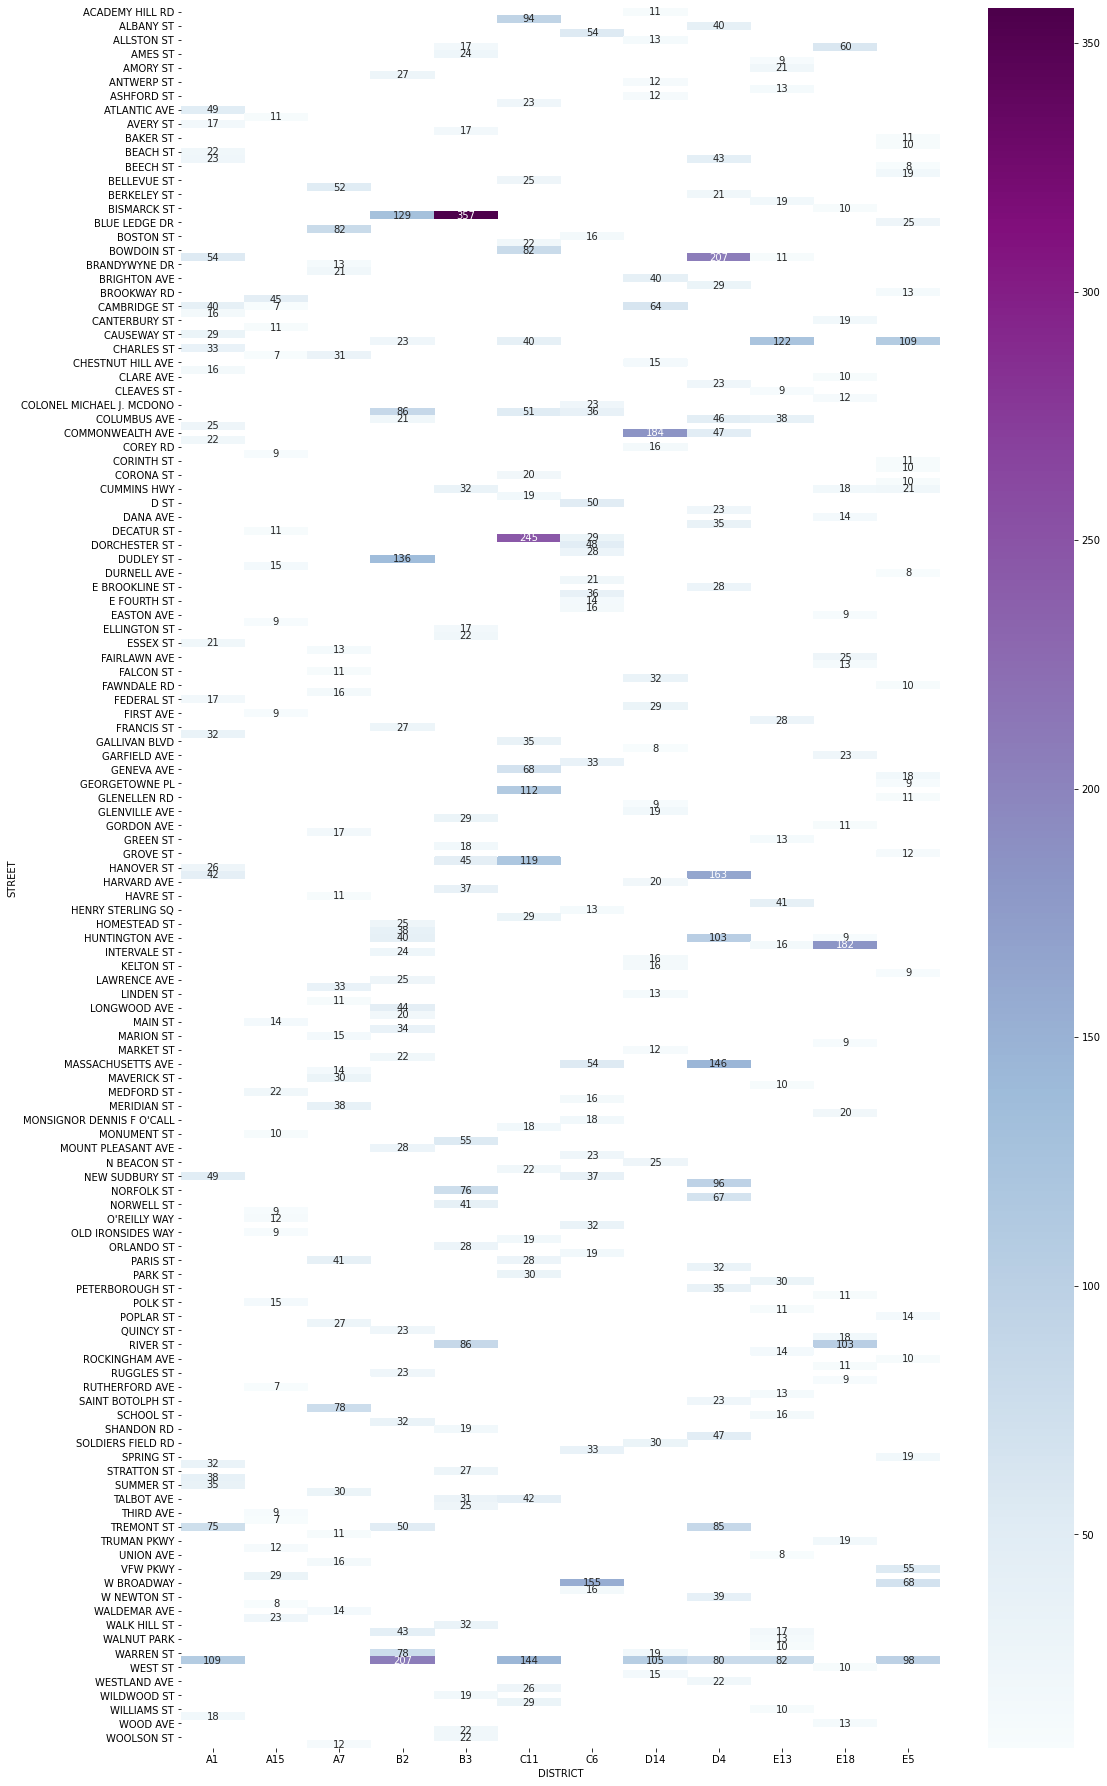

In [ ]:
inv_per = df.loc[(df.OFFENSE_DESCRIPTION == "INVESTIGATE PERSON")]
inv_per_st_dist = inv_per.groupby(["DISTRICT", "STREET"]).size().reset_index()
inv_per_st_dist.columns = ['DISTRICT', 'STREET', 'COUNT']
inv_per_st_dist = inv_per_st_dist.sort_values("COUNT",ascending=False)
inv_per_st_dist_head = inv_per_st_dist.groupby(["DISTRICT"]).head(24).sort_values("DISTRICT")


crimes = inv_per_st_dist_head.pivot("STREET", "DISTRICT", "COUNT")
plt.figure(figsize=(17,32))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="BuPu")

En çok görüldüğü bölge-sokak eşleri:

*   Blue Ledge Dr - B3
*   Dorchester St - C11
*   Boylston St - D4
*   Washington St - B2

### **iii) M/V - LEAVING SCENE - PROPERTY DAMAGE**

In [ ]:
leaving_scene = df.loc[df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE"]
leaving_scene_dist = leaving_scene.groupby(leaving_scene.DISTRICT).size().sort_values(ascending=False)
leaving_scene_dist

DISTRICT
B2     2832
C11    2792
B3     1783
D4     1415
D14    1412
C6     1305
A1     1212
E18    1054
E13     957
E5      850
A7      540
A15     413
dtype: int64

In [ ]:
leaving_scene = df.loc[df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE"]
leaving_scene_st = leaving_scene.groupby(leaving_scene.STREET).size().sort_values(ascending=False)
leaving_scene_st.head(12)

STREET
BLUE HILL AVE          507
WASHINGTON ST          477
DORCHESTER AVE         362
CENTRE ST              280
COMMONWEALTH AVE       226
COLUMBIA RD            215
HYDE PARK AVE          211
ADAMS ST               210
MASSACHUSETTS AVE      187
AMERICAN LEGION HWY    187
RIVER ST               175
BOYLSTON ST            141
dtype: int64

Bütün olarak bakarsak bu suçun en çok **Blue Hill Ave, Washington St** sokaklarında ve **B2, C11** bölgelerinde işlendiğini görüyoruz.

Şimdi bu suç türü için **bölge-sokak** özelinde inceleme yapalım.

In [ ]:
map_hooray = folium.Map(location=[42.321010, -71.057083],
                        zoom_start = 12, min_zoom=12, tiles="Stamen Toner")

heat_df = df[(df['OFFENSE_DESCRIPTION']== 'M/V - LEAVING SCENE - PROPERTY DAMAGE')]
heat_df = heat_df[['Lat', 'Long']]
heat_df = heat_df.dropna()

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

↑↑↑ **"M/V - Leaving Scene - Property Damage"** suçunun Boston geneline dağılımı

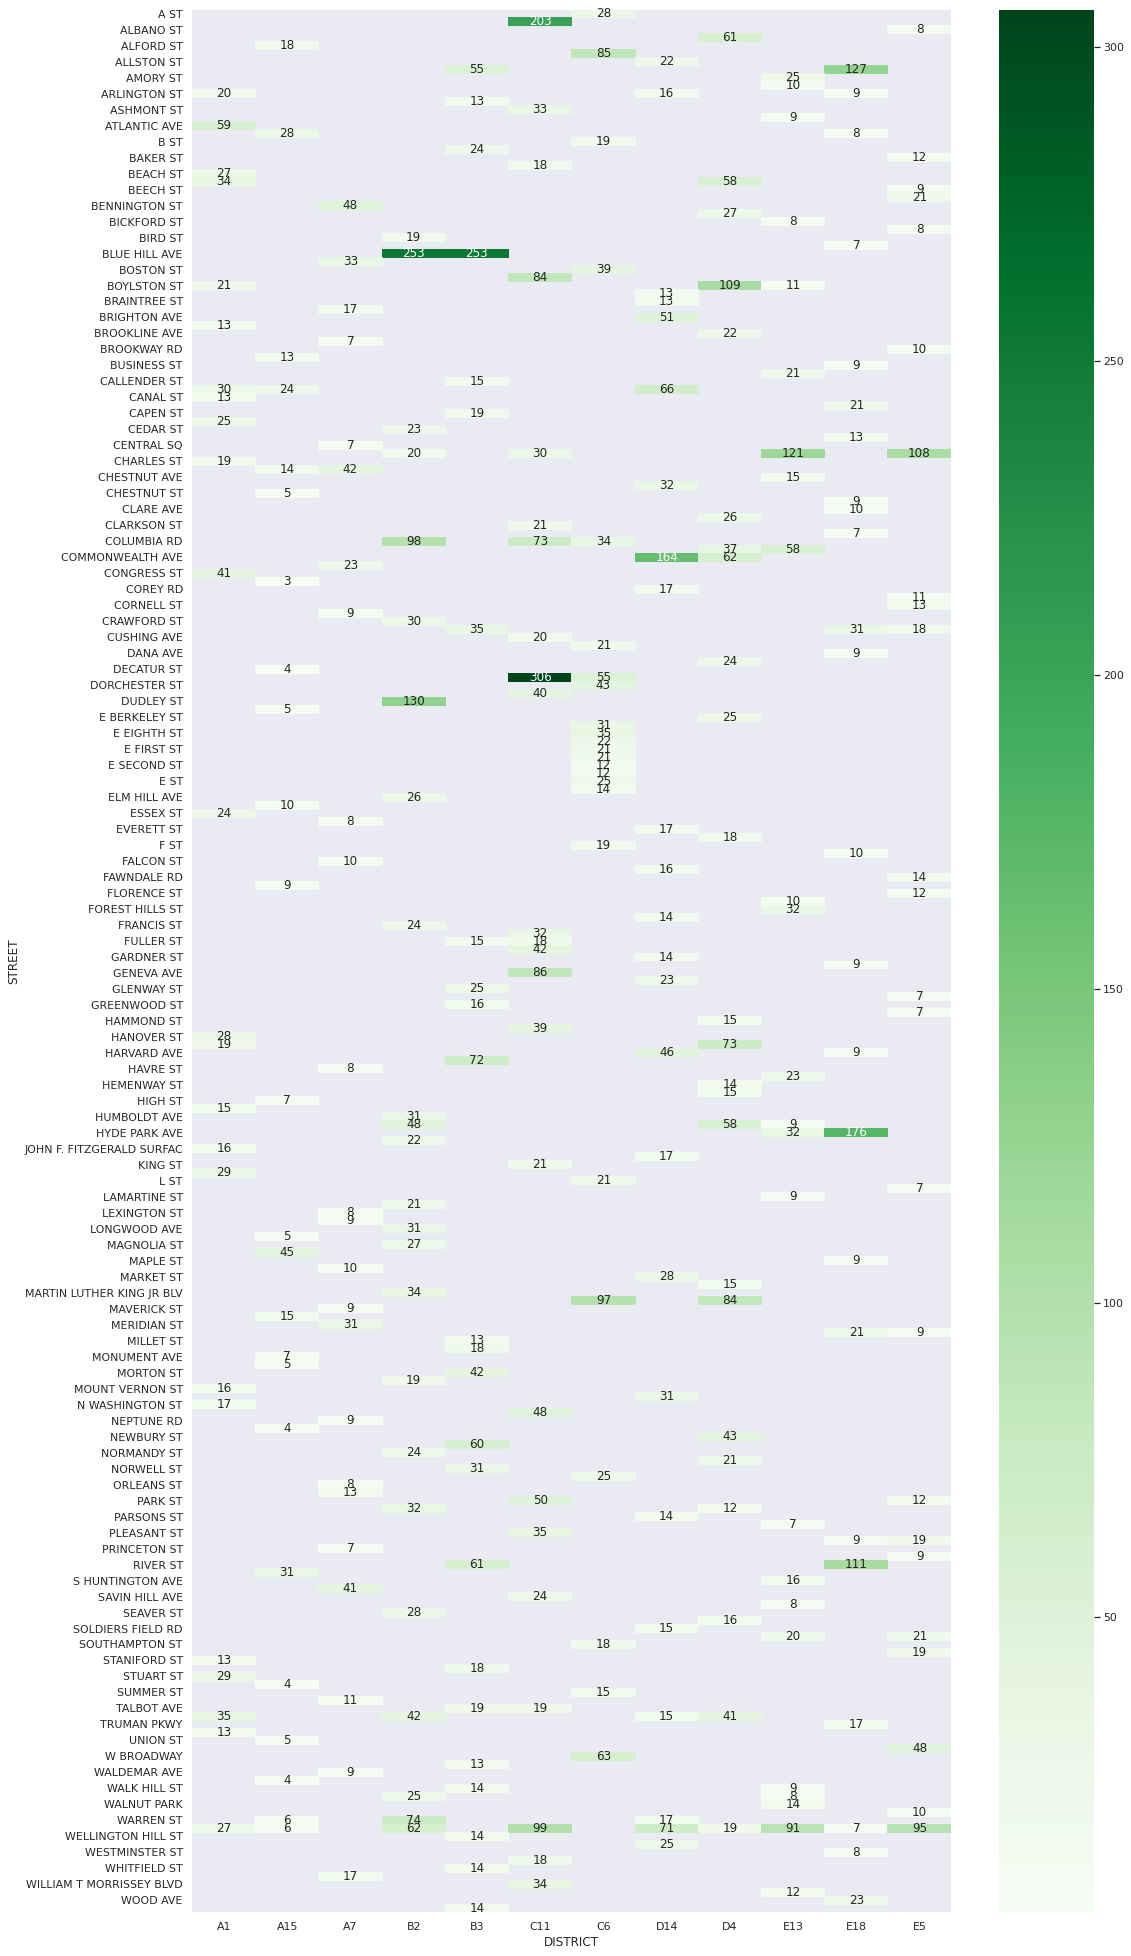

In [ ]:
leaving_scene = df.loc[(df.OFFENSE_DESCRIPTION == "M/V - LEAVING SCENE - PROPERTY DAMAGE")]
leaving_scene_dist_st = leaving_scene.groupby(["DISTRICT", "STREET"]).size().reset_index()
leaving_scene_dist_st.columns = ['DISTRICT', 'STREET', 'COUNT']
leaving_scene_dist_st = leaving_scene_dist_st.sort_values("COUNT",ascending=False)
leaving_scene_dist_st_head = leaving_scene_dist_st.groupby(["DISTRICT"]).head(24).sort_values("DISTRICT")


crimes = leaving_scene_dist_st_head.pivot("STREET", "DISTRICT", "COUNT")
plt.figure(figsize=(17,35))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="Greens")

En çok görüldüğü bölge-sokak eşleri:

*   Dorchester St - C11
*   Blue Hill Ave - B2
*   Blue Hill Ave - B3
*   Adams St - C11

## c) Sokaklar Özelinde Suç Türleri (en çok suç işlenen 3 sokak)

Farklı bir bakış olarak en çok suçun işlendiği ilk 3 sokak ve bu sokaklardaki suç dağılımına bakacağız.

In [ ]:
sorted_street = df['STREET'].value_counts().to_frame().reset_index().sort_values('STREET', ascending=False)
sorted_street.head(12)

,index,STREET
0,WASHINGTON ST,14590
1,BLUE HILL AVE,8002
2,BOYLSTON ST,7425
3,DORCHESTER AVE,5297
4,TREMONT ST,4925
5,MASSACHUSETTS AVE,4865
6,HARRISON AVE,4739
7,CENTRE ST,4487
8,COMMONWEALTH AVE,4291
9,HYDE PARK AVE,3572


En çok suç işlenen 3 sokak için suç türlerini inceleyelim.

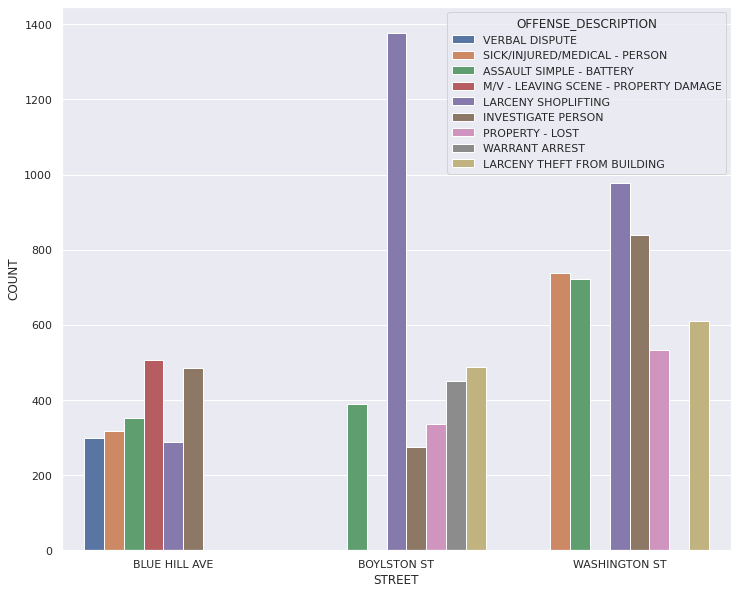

In [ ]:
ws_bha_bs = df.loc[(df.STREET == "WASHINGTON ST") | (df.STREET == "BLUE HILL AVE") | (df.STREET == "BOYLSTON ST")]
ws_bha_bs_desc = ws_bha_bs.groupby(["STREET","OFFENSE_DESCRIPTION"]).size().reset_index()
ws_bha_bs_desc.columns = ['STREET', 'OFFENSE_DESCRIPTION', 'COUNT']
ws_bha_bs_desc = ws_bha_bs_desc.sort_values("COUNT",ascending=False)
ws_bha_bs_desc_head = ws_bha_bs_desc.groupby(["STREET"]).head(6).sort_values("STREET")


plt.figure(figsize=(12, 10))
chart=sns.barplot(x="STREET",y="COUNT",hue="OFFENSE_DESCRIPTION",data=ws_bha_bs_desc_head)